# **Employee Burnout Prediction**

# **Importing Necessary Libraries**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle as pickle
import os

# **Loading Dataset**

In [2]:
data=pd.read_excel('employee_burnout_analysis-AI.xlsx')
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


# **Data Overview**

In [3]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [4]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [5]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [6]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [7]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [10]:
data.isnull().sum().values.sum()

4622

# **Exploratory Data Analysis**

In [11]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

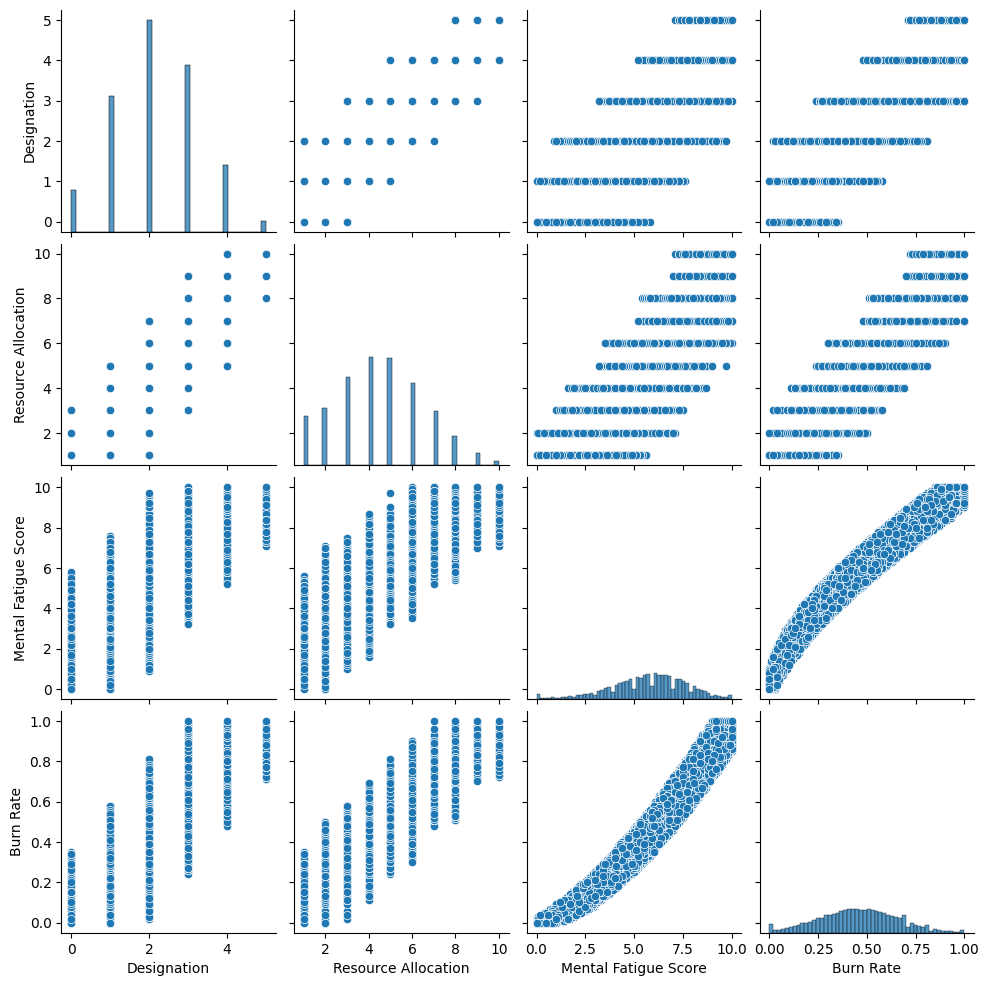

In [12]:
sns.pairplot(data)
plt.show()

In [13]:
data=data.dropna()

In [14]:
data.shape

(18590, 9)

In [15]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [16]:
data=data.drop('Employee ID',axis=1)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired Employees'>

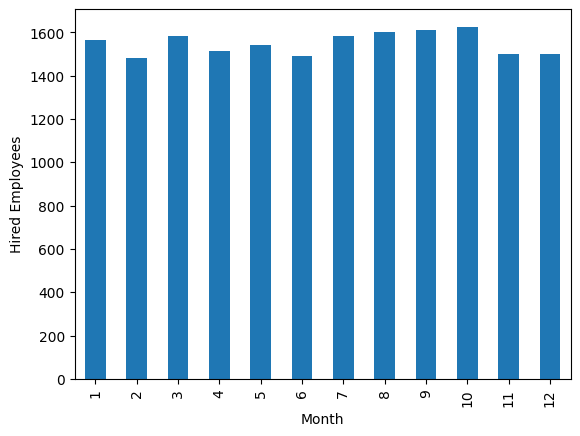

In [17]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month=data.copy()

data_month["Date of Joining"]=data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar",xlabel='Month',ylabel='Hired Employees')

In [18]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [19]:
numeric_data=data.select_dtypes(include=['number'])
correlation=numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [20]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [21]:
data=data.drop(['Date of Joining','Days'],axis=1)

In [22]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


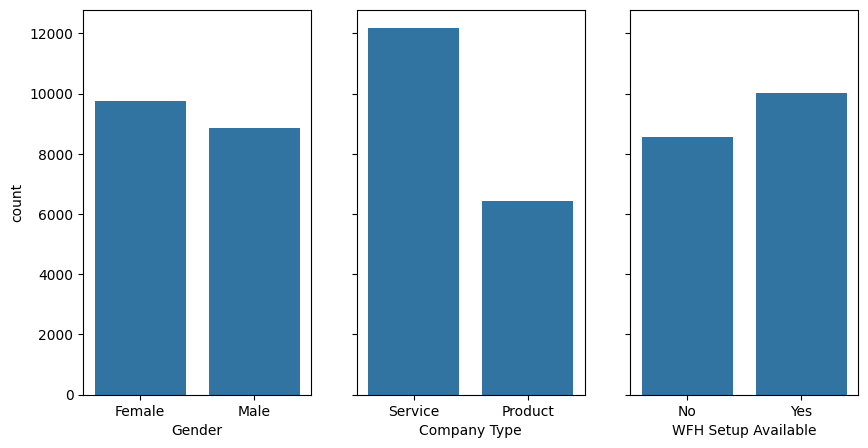

In [23]:
cat_columns=data.select_dtypes(object).columns
fig,ax=plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10,5))
for i,c in enumerate(cat_columns):
  sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

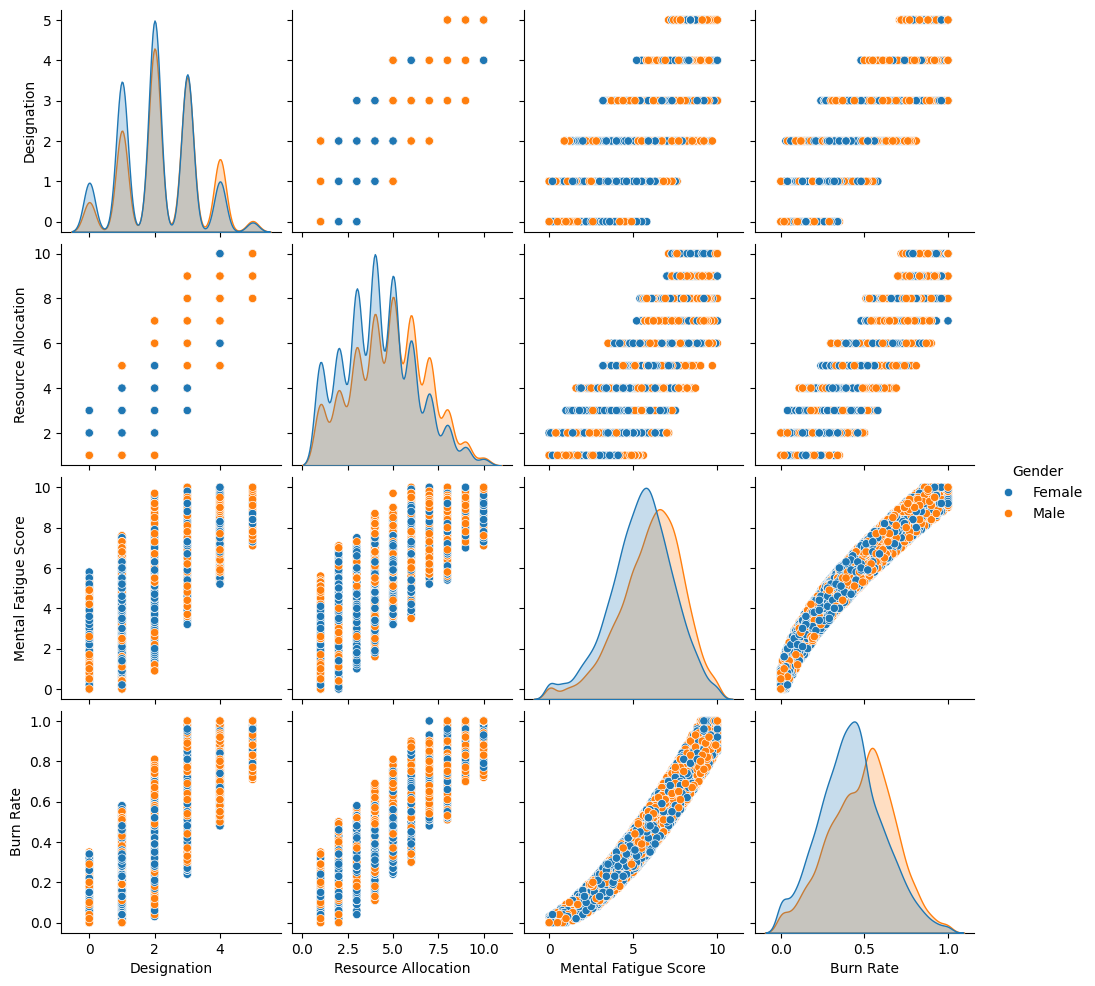

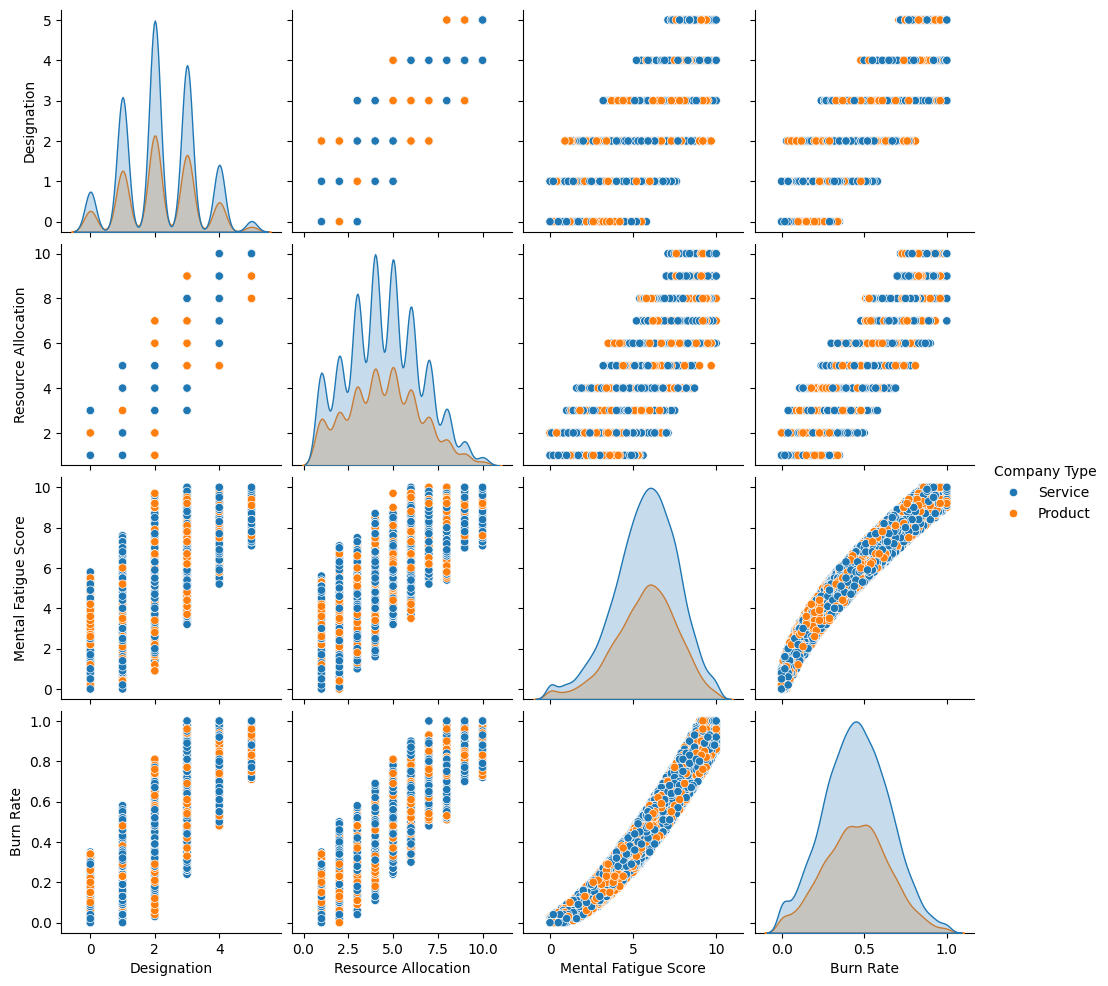

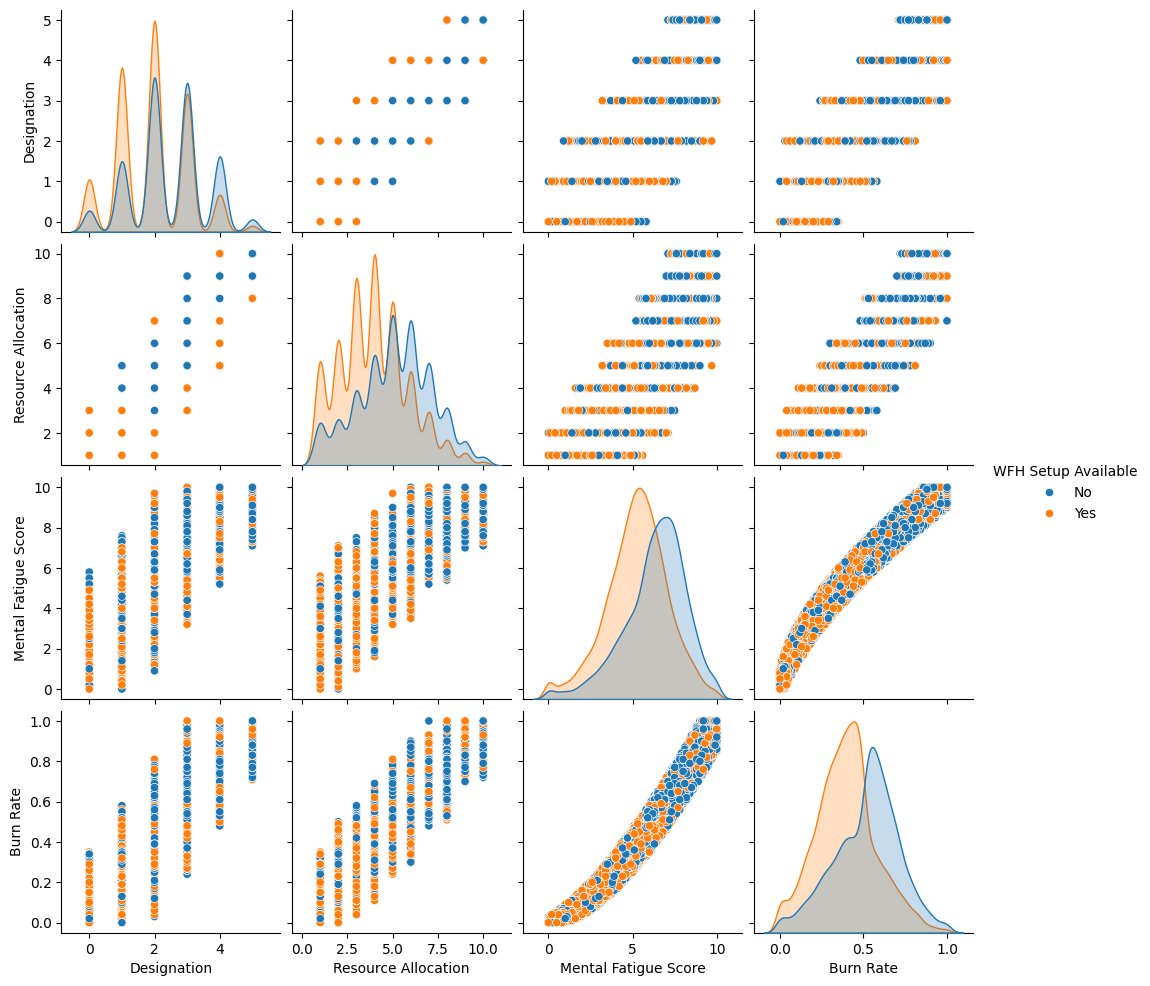

In [24]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

# **One-Hot Encoding for categorical features**

In [25]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

# **Preprocessing**

In [26]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [28]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'

# Create the 'models' directory if it doesn't exist
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

# Use pickle to save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [29]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [30]:
X_train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505


In [31]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [32]:
import os
import pickle
path="../data/processed/"
os.makedirs(path,exist_ok=True)
X_train.to_csv(path+'X_train_processed.csv',index=False)
y_train.to_csv(path+'y_train_processed.csv',index=False)

# **Model Building**

# **Linear Regression**

In [33]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [34]:
print(X_test)

       Designation  Resource Allocation  Mental Fatigue Score  \
14239    -0.159330            -0.238066             -0.010025   
15056    -1.041987            -0.726317             -1.562452   
12187     1.605983             0.738436              0.507451   
248       0.723327             0.250185             -0.010025   
12710    -0.159330             0.250185             -0.217015   
...            ...                  ...                   ...   
21709     1.605983             0.738436              1.128421   
2760     -0.159330             0.250185             -0.424005   
20275    -1.041987            -0.726317             -0.165268   
13124    -0.159330            -0.238066              0.869683   
12892    -1.041987            -0.726317             -1.044976   

       Company Type_Service  WFH Setup Available_Yes  Gender_Male  
14239              0.724706                 0.923961    -0.951018  
15056              0.724706                 0.923961    -0.951018  
12187          

In [35]:
print(y_test)

14239    0.38
15056    0.21
12187    0.65
248      0.40
12710    0.31
         ... 
21709    0.66
2760     0.37
20275    0.36
13124    0.55
12892    0.20
Name: Burn Rate, Length: 5577, dtype: float64


In [36]:
print('Linear Regression Model Performance Metrics:\n')
y_pred=linear_regression_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)
rmse=mean_squared_error(y_test,y_pred,squared=False)
print('Root Mean Squared Error:',rmse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
r2=r2_score(y_test,y_pred)
print('R-squared Score',r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score 0.918822674247248


In [37]:
print(y_pred)

[0.42995313 0.18546762 0.55552742 ... 0.38424784 0.56626681 0.26399529]


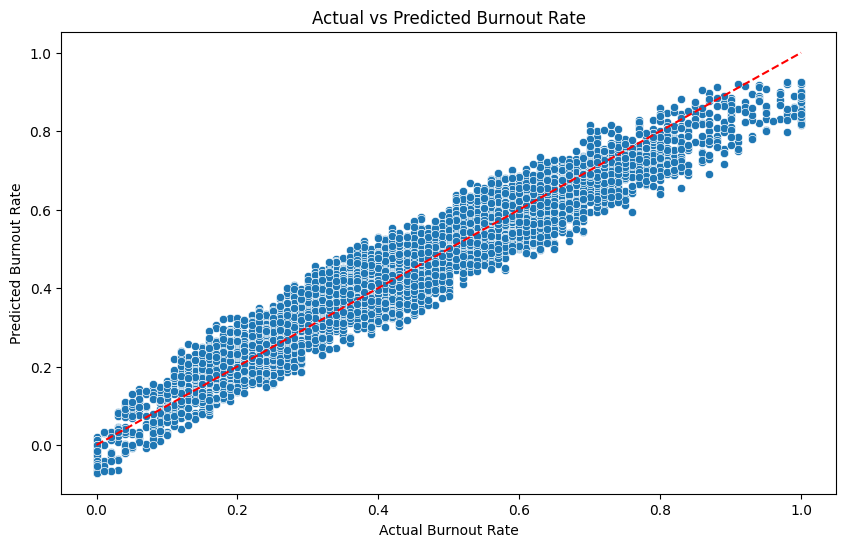

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a DataFrame for visualization
visualization_df = X_test.copy()
visualization_df['Actual Burnout Rate'] = y_test
visualization_df['Predicted Burnout Rate'] = y_pred

# Visualizing Actual vs Predicted Burnout Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Burnout Rate')
plt.ylabel('Predicted Burnout Rate')
plt.title('Actual vs Predicted Burnout Rate')
plt.show()


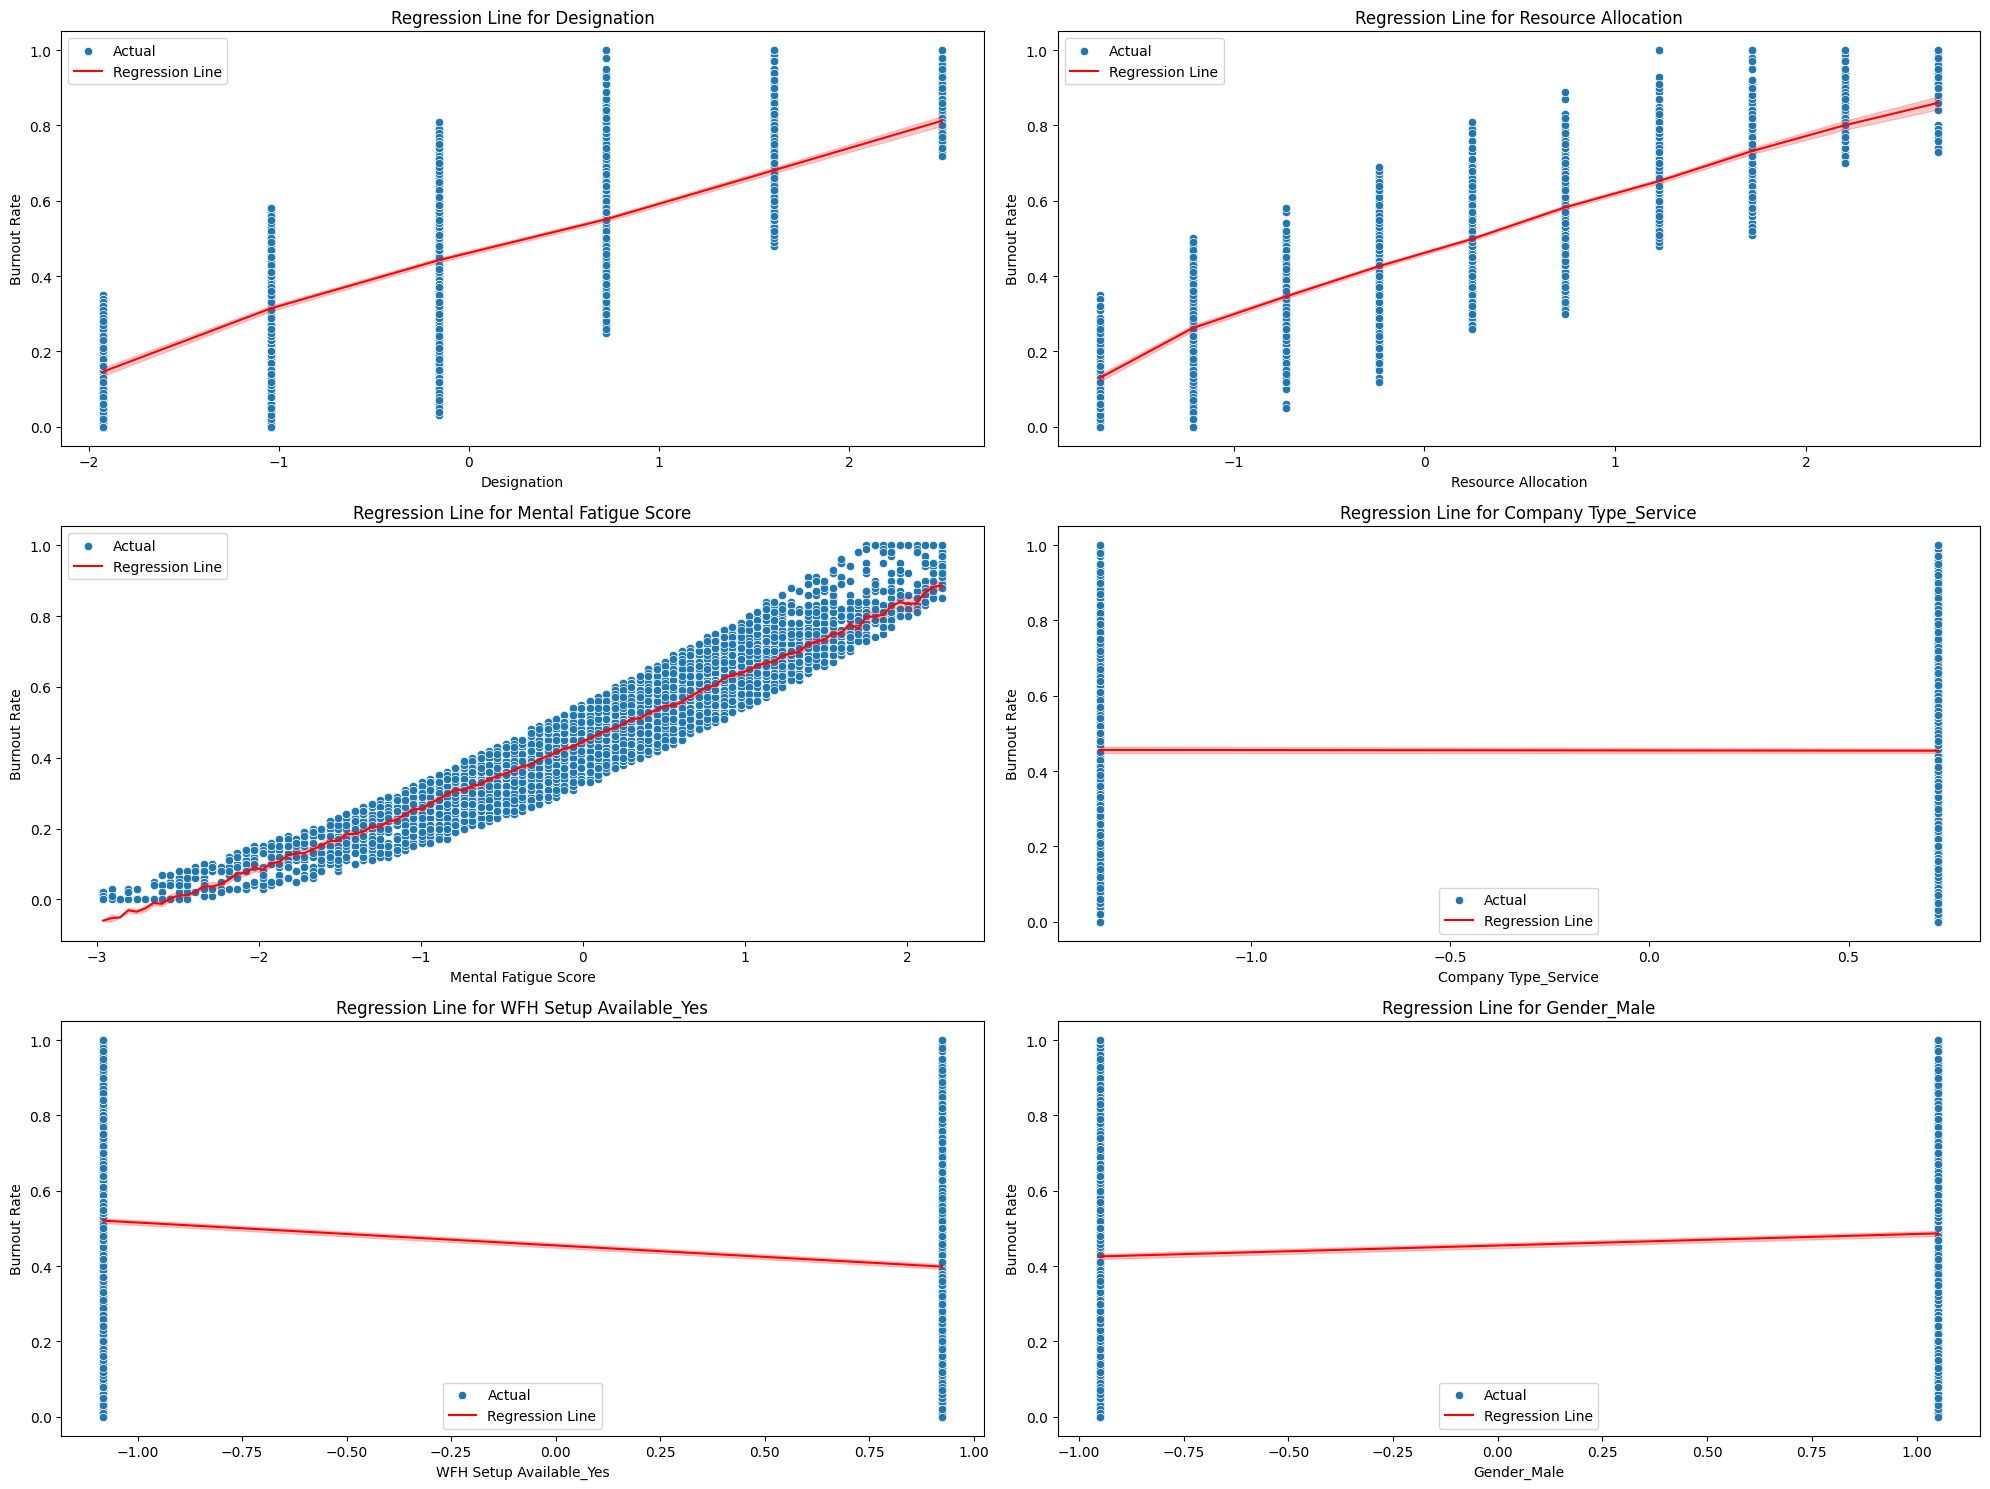

In [39]:
# Plotting regression lines for all features
feature_columns = X_test.columns
plt.figure(figsize=(20, 15))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(3, 2, i)  # Adjust the layout as needed
    sns.scatterplot(x=visualization_df[feature], y=visualization_df['Actual Burnout Rate'], label='Actual')
    sns.lineplot(x=visualization_df[feature], y=visualization_df['Predicted Burnout Rate'], color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Burnout Rate')
    plt.title(f'Regression Line for {feature}')
    plt.legend()

plt.tight_layout()
plt.show()


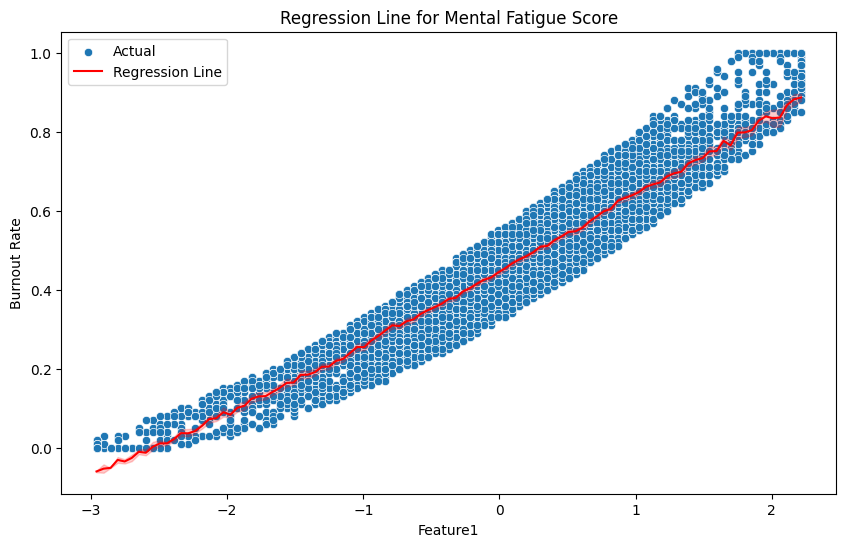

In [40]:
# Visualizing the Regression Line for Feature1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mental Fatigue Score', y='Actual Burnout Rate', data=visualization_df, label='Actual')
sns.lineplot(x='Mental Fatigue Score', y='Predicted Burnout Rate', data=visualization_df, color='red', label='Regression Line')
plt.xlabel('Feature1')
plt.ylabel('Burnout Rate')
plt.title('Regression Line for Mental Fatigue Score')
plt.legend()
plt.show()


# **Testing**

In [41]:
p=[[-0.159330, -0.238066, -0.010025, 0.724706, 0.923961, -0.951018],[-1.041987, -0.726317, -1.562452 , 0.724706, 0.923961, -0.951018], [1.605983, 0.738436, 0.507451,-1.379869, 0.923961, 1.051505 ]]
# p=np.array([p])
df = pd.DataFrame(p, columns=["Designation", "Resource Allocation", "Mental Fatigue Score", "Company Type_Service", "WFH Setup Available_Yes", "Gender_Male"])
print(df)

   Designation  Resource Allocation  Mental Fatigue Score  \
0    -0.159330            -0.238066             -0.010025   
1    -1.041987            -0.726317             -1.562452   
2     1.605983             0.738436              0.507451   

   Company Type_Service  WFH Setup Available_Yes  Gender_Male  
0              0.724706                 0.923961    -0.951018  
1              0.724706                 0.923961    -0.951018  
2             -1.379869                 0.923961     1.051505  


In [42]:
pred=linear_regression_model.predict(df)
print(pred)

[0.42995313 0.18546758 0.55552748]


In [43]:
classified_predictions = []
for c in pred:
    if c >= 0 and c <= 0.33:
        print(f'Prediction: {c} - Low burnout rate')
        classified_predictions.append('Low')
    elif c >= 0.34 and c <= 0.66:
        print(f'Prediction: {c} - Moderate burnout rate')
        classified_predictions.append('Moderate')
    else:
        print(f'Prediction: {c} - High burnout rate')
        classified_predictions.append('High')

Prediction: 0.4299531306852891 - Moderate burnout rate
Prediction: 0.18546757789915236 - Low burnout rate
Prediction: 0.5555274840524546 - Moderate burnout rate


In [44]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
y_new_test = np.array([0.38, 0.21, 0.65])
y_test_labels = ['Moderate', 'Low', 'Moderate']

accuracy = accuracy_score(y_test_labels, classified_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Evaluating model performance
mse = mean_squared_error(y_new_test, pred)
r2 = r2_score(y_new_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Accuracy: 100.00%
Mean Squared Error: 0.004007403756284987
R-squared: 0.877905775874865


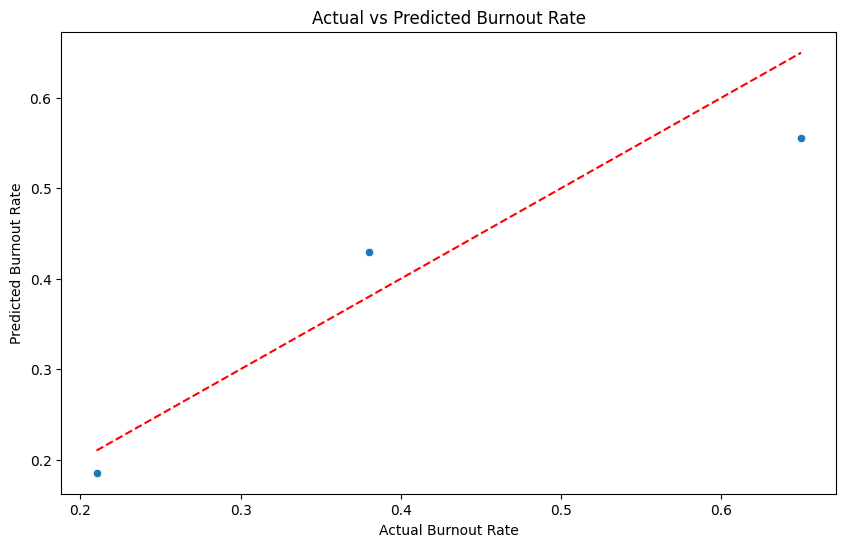

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a DataFrame for visualization
visualization_df = df.copy()
visualization_df['Actual Burnout Rate'] = y_new_test
visualization_df['Predicted Burnout Rate'] = pred

# Visualizing Actual vs Predicted Burnout Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_new_test, y=pred)
plt.plot([min(y_new_test), max(y_new_test)], [min(y_new_test), max(y_new_test)], color='red', linestyle='--')
plt.xlabel('Actual Burnout Rate')
plt.ylabel('Predicted Burnout Rate')
plt.title('Actual vs Predicted Burnout Rate')
plt.show()


# **Support Vector Machine(Linear Kernel)**

In [46]:
from sklearn.svm import LinearSVR

# Create the model with the correct parameters
SVMLinear = LinearSVR(dual=True, C=1.0, max_iter=1000, random_state=42)

# Fit the model
SVMLinear.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [47]:
#Support Vector Machine (Linear Kernel) Performance Metrics
print("Support Vector Machine (Linear Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMLinear.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Support Vector Machine (Linear Kernel) Performance Metrics

Mean Squared Error: 0.003242003391288931
Root Mean Squared Error: 0.056938593162185976
Mean Absolute Error: 0.04613085977730072
R-squared Score: 0.9166363614901809


# **Support Vector Machine (RBF Kernel)**

In [48]:
from sklearn.svm import SVR
SVMRbf = SVR()
SVMRbf.fit(X_train, y_train)

SVR()

In [49]:
#Support Vector Machine (RBF Kernel) Performance Metrics
print("Support Vector Machine (RBF Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMRbf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Support Vector Machine (RBF Kernel) Performance Metrics

Mean Squared Error: 0.00341204574122986
Root Mean Squared Error: 0.058412719002199
Mean Absolute Error: 0.04962241383880883
R-squared Score: 0.9122639573681112


# **Random Forest Reggressor**

In [50]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
#RandomForestRegressor Performance Metrics
print("RandomForestRegressor Performance Metrics\n")
# Make predictions on the test set
y_pred = RandomForest.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

RandomForestRegressor Performance Metrics

Mean Squared Error: 0.003377178364056767
Root Mean Squared Error: 0.05811349554154153
Mean Absolute Error: 0.04587083129830456
R-squared Score: 0.9131605238042393


Based on the evaluation metrics, the Linear Regression model appears to be the best model for predicting burnout analysis.

It has the lowest mean squared error, root mean squared error, and mean absolute error, indicating better accuracy and precision in its predictions. Additionally, it has the highest R-squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.

So we are choosing this model for deployment.